## [타이타닉 분석]
- 생존자 중 성별 비율 시각화
- 나이별 생존자의 성별 비율 비교 시각화 (하나의 Figure에 모두 표시)

In [76]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# [2] 데이터 준비
FILE_DATA=r'C:\Users\KDP15\Desktop\KDT6\EX_PANDAS06\DATA\titanic.csv'

In [78]:
# [3] csv--> dataFrame으로 불러오기
titianDF=pd.read_csv(FILE_DATA)

In [79]:
# [4] 데이터 확인
titianDF.info()
print(titianDF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0

In [80]:
# [주제 5 -1 ] 분석주제 => 생존자의 성별 비율
titianDF.loc[:,['survived','sex']].isna().sum()

survived    0
sex         0
dtype: int64

In [81]:
sur_gender=titianDF[titianDF['survived']==1]['sex'].value_counts(normalize=True) # 생존자 들 만 뽑아냄, normalize를 사용하면 비율만 뽑아낼수있다.

In [82]:
sur_gender #시리즈 

sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64

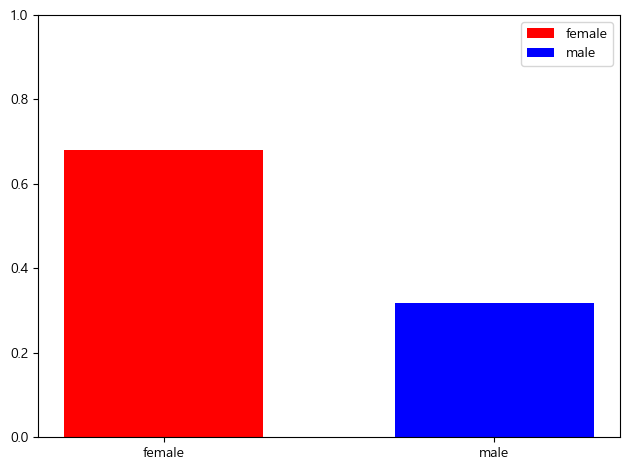

In [83]:
plt.figure()
plt.bar(sur_gender.index,sur_gender.values, width=0.6, color=['red', 'blue'], label=['female', 'male'])
plt.ylim(bottom=0, top=1)
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
# [주제 5-2 ] 분석주제 => 나이별 생존자의 성별 비율 비교 시각화 

In [85]:
titianDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [86]:
# 성별 결측치
titianDF['age'].isna().sum()

177

In [87]:
titianDF.dropna(subset=['age'],inplace=True)

In [88]:
custom_bins = [0, 18, 35, 50, 65, 100]
ages=pd.cut(titianDF['age'], bins=custom_bins, labels=['청소년','청년','중년','장년','노년'])
titianDF['ages']=ages


In [89]:
survivors=titianDF[titianDF['survived']==1] 

In [90]:
sur_age_sex=survivors.groupby('ages',observed= True)['sex'].value_counts(normalize=True) #시리즈

In [91]:
sur_age_sex['청소년'].index

Index(['female', 'male'], dtype='object', name='sex')

In [92]:
sur_age_sex.values

array([0.65714286, 0.34285714, 0.68613139, 0.31386861, 0.67213115,
       0.32786885, 0.76190476, 0.23809524, 1.        ])

In [93]:
import df_set_customFont as Fot

In [94]:
Fot.set_customFont('C:\Windows\Fonts\malgun.ttf')

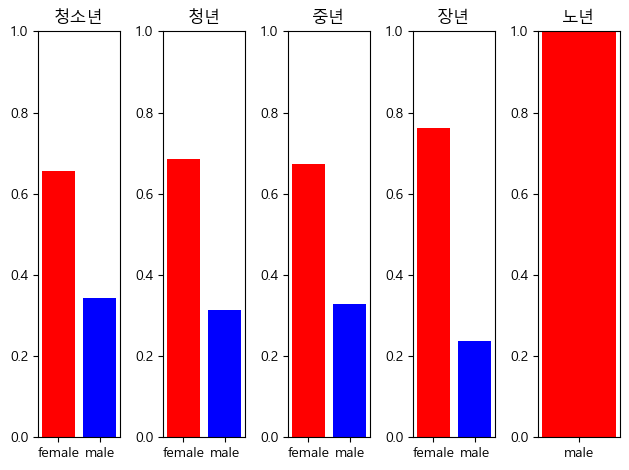

In [97]:
fig=plt.figure()

ax1=fig.add_subplot(1,5,1) 
ax1.bar(sur_age_sex['청소년'].index,sur_age_sex.values[0:2], color=['red','blue'])
ax1.set_ylim(bottom=0,top=1)
ax1.set_title('청소년')


ax2=fig.add_subplot(1,5,2) 
ax2.bar(sur_age_sex['청년'].index,sur_age_sex.values[2:4], color=['red','blue'])
ax2.set_ylim(bottom=0,top=1)
ax2.set_title('청년')

ax3=fig.add_subplot(1,5,3) 
ax3.bar(sur_age_sex['중년'].index,sur_age_sex.values[4:6], color=['red','blue'])
ax3.set_ylim(bottom=0,top=1)
ax3.set_title('중년')

ax4=fig.add_subplot(1,5,4) 
ax4.bar(sur_age_sex['장년'].index,sur_age_sex.values[6:8], color=['red','blue'])
ax4.set_ylim(bottom=0,top=1)
ax4.set_title('장년')

ax5=fig.add_subplot(1,5,5) 
ax5.bar(sur_age_sex['노년'].index,sur_age_sex.values[8:],color=['red','blue'])
ax5.set_ylim(bottom=0,top=1)
ax5.set_title('노년')
plt.tight_layout()
plt.show()